Community 1: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Community 2: [4, 5, 6, 10, 16]
Community 4: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]
Community 3: [24, 25, 28, 31]


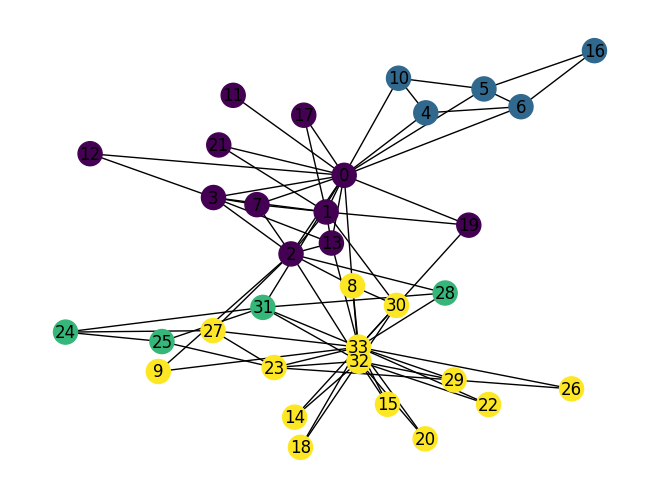

In [1]:
import networkx as nx
import community  # Import the community library

# Create a sample graph
G = nx.karate_club_graph()

# Detect communities using the Louvain method
partition = community.best_partition(G)

# Create a dictionary that maps nodes to their respective communities
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Print the detected communities
for community_id, nodes in communities.items():
    print(f"Community {community_id + 1}: {nodes}")

# You can also visualize the graph with nodes colored by community
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
colors = [partition[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()


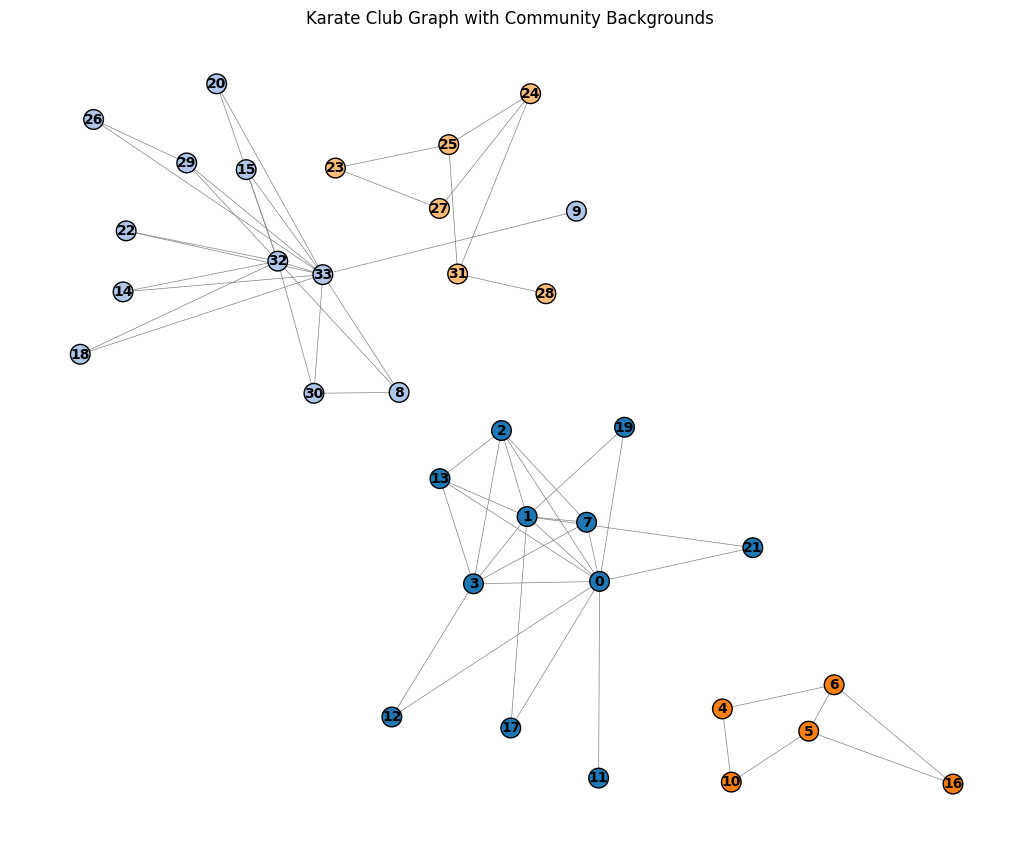

In [3]:
import networkx as nx
import community
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.karate_club_graph()

# Detect communities using the Louvain method
partition = community.best_partition(G)

# Create a dictionary that maps nodes to their respective communities
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Create a color map for the communities
colors = list(plt.cm.tab20.colors)  # List of distinct colors
node_colors = [colors[community_id % len(colors)] for community_id in partition.values()]

# Plot each community with a background color
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

for community_id, nodes in communities.items():
    subgraph = G.subgraph(nodes)
    nx.draw(subgraph, pos, node_color=[node_colors[n] for n in subgraph.nodes()], with_labels=True,
            node_size=200, font_size=10, font_color='k', font_weight='bold',
            node_shape='o', edge_color='gray', width=0.5,
            edgecolors='k', linewidths=1.0)  # Use edgecolors and linewidths here

plt.title("Karate Club Graph with Community Backgrounds")
plt.axis('off')
plt.show()
